# Prerequisites

In [1]:
import os, sys

import numpy as np
import tqdm
import torch

/home/marco/miniconda3/envs/nlp2022-hw3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Important paths for the notebook:

In [2]:
app_root = '../../../../'
test_name = 'test3'
datasets_path = os.path.join(app_root, 'data')
model_dir_path = os.path.join(app_root, 'model', test_name)

data_train_path = os.path.join(datasets_path, 'train.tsv')
data_dev_path = os.path.join(datasets_path, 'dev.tsv')

In [3]:
sys.path.append('../../../')

%load_ext autoreload
%autoreload 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Setting the seed for reproducibility:

In [4]:
SEED = 28

# random.seed(SEED) # not used
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [5]:
global_params = {
    'batch_size': 32,
    'PAD_TOKEN': '<pad>',
    'UNK_TOKEN': '<unk>',
    'transformer_name': "bert-base-cased",
    'mention_tags': {
        'p_open':  '<P>', 'p_close':  '</P>', 
        'e_open':  '<E>', 'e_close':  '</E>', 
    },
}

# Dataset

In [6]:
from stud.modelsTests.dataset.PronDataset_transformer_simple import PronDataset_transformer_simple

In [7]:
dataset_train = PronDataset_transformer_simple(
    data_train_path, 
    tokenizer = global_params['transformer_name'])

dataset_dev = PronDataset_transformer_simple(
    data_dev_path, 
    tokenizer = global_params['transformer_name'])

In [8]:
global_params.update({ 
    'token_embeddings_len': len(dataset_train.tokenizer),
    'resize_token_embeddings': False, # ! not used
})

In [9]:
np.save(os.path.join(model_dir_path, 'global_params.npy'), global_params)

# Dataloader

In [10]:
from torch.utils.data import DataLoader

In [11]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
num_workers = 4

In [12]:
dataloader_train = DataLoader(
    dataset_train,
    batch_size=global_params['batch_size'],
    collate_fn=dataset_train.create_collate_fn(),
    num_workers=num_workers,
    shuffle=True,
)

dataloader_dev = DataLoader(
    dataset_dev,
    batch_size=global_params['batch_size'],
    collate_fn=dataset_dev.create_collate_fn(),
    num_workers=num_workers,
    shuffle=False,
)

In [13]:
for e in dataloader_dev:
    ex_in = e
    break

In [14]:
ex_in.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'words_ids', 'pronoun_hypotesis_ids', 'possible_pronoun_ids', 'gold_pronoun_id', 'gold_pronoun'])

In [15]:
idx = 1
print(ex_in['words_ids'][idx])
ex_in['possible_pronoun_ids'][idx], ex_in['gold_pronoun'][idx]

[-1, 0, 1, 1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 30, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 43, 43, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [16]:
print(ex_in['input_ids'][idx][:80], ex_in['input_ids'].shape)

tensor([  101, 15182,  1753,  1204,  1108,  1255,  1107, 14805,  3169,  3192,
          117,  1498,   119,  1430,  1401,   117,  4367,   117,  1108,   170,
         4941, 27892, 27229, 17588,   117,  1105,  1123,  1534,   117,  8821,
          117,  1868,   170,  9678,  1402,  1107,   139, 14799,  1633,   132,
        15182,  1108,  1147,  1503,  1797,   119,  1153,  1108,  4512,  1120,
         2090, 10136,  6943, 19773,  1197,  4808,   112,  1323,   113,  1208,
         1804,   114,   117,  1498,   117,  1196,  6546,  1624,   112,   188,
         1531,   117,  1498,   119,   102,     0,     0,     0,     0,     0]) torch.Size([32, 134])


# Printing model

In [17]:
from stud.modelsTests.utils.print_infos import print_summary, display_history, plot_confusion_matrix, print_classification_report

# Fine-tuning the model

In [18]:
from stud.modelsTests.model_1.model1_transformer_simple_multilogits import Model1
import torch.optim as optim

loss_function = torch.nn.BCELoss()

final_model = Model1(
    device = device,
    loss_fn = loss_function,
    model_load_weights = False,
    fine_tune_transformer = True,
)

optimizer = optim.SGD(final_model.model.parameters(), lr=0.0016, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.0016)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
freeze_some = False
if freeze_some:
    unfreeze_word_embeddings = False
    unfreeze_transformer_layers = True
    unfreeze_from_layer_num = 8
    unfreeze_to_layer_num = 99
    unfreeze_pooler = True

    for name, param in final_model.model.named_parameters():

        if name.startswith('transformer_model.embeddings'):
            param.requires_grad = unfreeze_word_embeddings

        elif name.startswith('transformer_model.encoder.layer'):
            layer_num = int(name.split('.')[3])
            if layer_num >= unfreeze_from_layer_num and layer_num <= unfreeze_to_layer_num:
                param.requires_grad = unfreeze_transformer_layers
            else:
                param.requires_grad = False

        elif name.startswith('transformer_model.pooler'):
            param.requires_grad = unfreeze_pooler
        
        print(param.requires_grad, name)

In [20]:
print_summary(final_model.model)

Model1_net(
  (transformer_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [21]:
ex_in_simple = dataset_dev.create_collate_fn()([dataset_dev[0], dataset_dev[1], dataset_dev[2]])
predictions = final_model.model(
    input_ids = ex_in_simple['input_ids'].to(device), 
    attention_mask = ex_in_simple['attention_mask'].to(device),
    token_type_ids = ex_in_simple['token_type_ids'].to(device),
    predicted_pronouns = ex_in_simple['possible_pronoun_ids'].to(device),
)
labels = ex_in_simple['gold_pronoun'].to(device)

print(labels)
print(predictions)
print(final_model.model.compute_loss(predictions, labels ))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [22]:
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
print(final_model.predict(dataset_dev.data_raw[0]))

{'id': 'validation-1', 'text': 'He admitted making four trips to China and playing golf there. He also admitted that ZTE officials, whom he says are his golf buddies, hosted and paid for the trips. Jose de Venecia III, son of House Speaker Jose de Venecia Jr, alleged that Abalos offered him US$10 million to withdraw his proposal on the NBN project.', 'pron': 'He', 'p_offset': 0, 'entity_A': 'Jose de Venecia Jr', 'offset_A': 208, 'is_coref_A': 'FALSE', 'entity_B': 'Abalos', 'offset_B': 241, 'is_coref_B': 'FALSE'}


In [23]:
history = {}

In [44]:
from stud.modelsTests.utils.Trainer_model1_transformer_simple_multilogits import Trainer_model1_transformer_simple_multilogits

trainer = Trainer_model1_transformer_simple_multilogits()

history = trainer.train(
    final_model, optimizer, dataloader_train, dataloader_dev,
    epochs=40, device=device,
    save_best=True, 
    min_score=0.6,
    save_path_name=os.path.join(model_dir_path, 'model1_weights_transformer_simple_multilogits.pth'),
    saved_history=history
)

Epoch   0 => avg_loss: 0.006963
WARN: there are 23 offset errors, out of 400 correct in 454 total!
#               Validation loss => 0.008301 | accuracy: 0.881057 #
Epoch   1 => avg_loss: 0.006851
WARN: there are 23 offset errors, out of 400 correct in 454 total!
#               Validation loss => 0.008229 | accuracy: 0.881057 #
Epoch   2 => avg_loss: 0.006748
WARN: there are 23 offset errors, out of 400 correct in 454 total!
#               Validation loss => 0.008210 | accuracy: 0.881057 #
Epoch   3 => avg_loss: 0.006786
WARN: there are 23 offset errors, out of 400 correct in 454 total!
#               Validation loss => 0.008177 | accuracy: 0.881057 #
Epoch   4 => avg_loss: 0.006689
WARN: there are 23 offset errors, out of 400 correct in 454 total!
#               Validation loss => 0.008131 | accuracy: 0.881057 #
Epoch   5 => avg_loss: 0.006673
WARN: there are 23 offset errors, out of 400 correct in 454 total!
#               Validation loss => 0.008093 | accuracy: 0.881057 #
Epoc

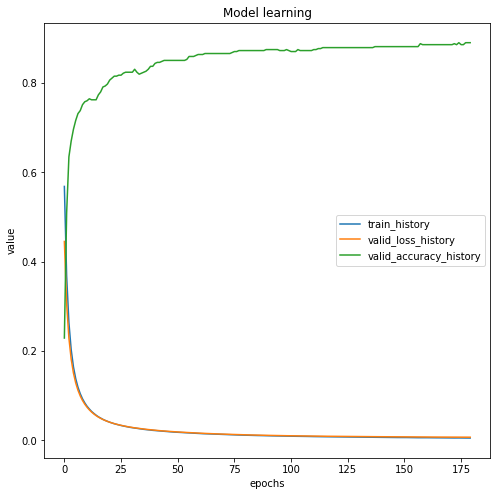

In [46]:
display_history(history)

In [47]:
blacklist = []

for idxxx in range(len(dataset_dev.data_raw)):
    eerrs = final_model.predict(dataset_dev.data_raw[idxxx])
    if eerrs['pron'] == dataset_dev.data_raw[idxxx]['pron'] and eerrs['p_offset'] != dataset_dev.data_raw[idxxx]['p_offset'] and idxxx not in blacklist:
        print(dataset_dev.data_raw[idxxx]['text'], [dataset_dev.data_raw[idxxx]['pron'], dataset_dev.data_raw[idxxx]['p_offset']])
        print([eerrs['pron'], eerrs['p_offset']], idxxx)
        break

``I know this for a fact that the manager and the players are 100 per cent behind David Dein and I can see real repercussions coming off the back of this.'' http://www.independent.co.uk/sport/football/premier-league/players-upset-by-deins-departure-445419.html%20 Thierry Henry claimed that David Dein's departure as vice-chairman had dismayed him and left him in no doubt that it was time to move on. ['him', 344]
['him', 377] 106


In [39]:
"``I know this for a fact that the manager and the players are 100 per cent behind David Dein and I can see real repercussions coming off the back of this.'' http://www.independent.co.uk/sport/football/premier-league/players-upset-by-deins-departure-445419.html%20 Thierry Henry claimed that David Dein's departure as vice-chairman had dismayed him and left him in no doubt that it was time to move on."[377:]

' it was time to move on.'

In [28]:
import re
pron = 'him'
regexed = r"" + "\W(" + pron + ")\W"
strdd = "http://www.independent.co.uk/sport/football/premier-league/players-upset-by-deins-departure-445419.html%20 that him is lol"
resex = re.search(regexed, strdd)

In [29]:
strdd[resex.start()+1:]

'him is lol'

# Eval

In [48]:
from stud.modelsTests.model_1.model1_transformer_simple_multilogits import Model1

final_model = Model1(device = device)

In [49]:
from stud.modelsTests.utils.Trainer_model1_transformer_simple_multilogits import Trainer_model1_transformer_simple_multilogits

trainer = Trainer_model1_transformer_simple_multilogits()

evaluate = trainer.compute_evaluations

In [50]:
predictions = []
with torch.no_grad():
    for step, sample in enumerate(dataset_dev.data_raw):
        predictions.append( final_model.predict(sample) )

In [51]:
ev_res = evaluate(predictions, dataset_dev.data_raw)
ev_res

WARN: there are 23 offset errors, out of 404 correct in 454 total!


{'accuracy': 0.8898678414096917}